# Coding Exercises (Part 14)

## Financial Indexes

## Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
us_stocks=pd.read_csv("us_stocks.csv",parse_dates=True,index_col=0,header=[0,1]).Close["31-12-2013":"1-1-2019"]
us_stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,90.730003,54.650002,25.959999,97.029999,81.410004,78.690002
2014-01-02,89.449997,54.709999,25.790001,96.410004,80.540001,78.910004
2014-01-03,89.739998,54.560001,25.780001,96.540001,80.449997,78.650002
2014-01-06,89.699997,57.200001,25.459999,95.849998,80.639999,78.209999
2014-01-07,89.360001,57.919998,25.590000,96.379997,81.419998,78.449997


__Create__ the __Price-weighted__ (Price Return) Index (starting at a Base Value of 100) !

In [14]:
norm = us_stocks/us_stocks.iloc[0]*100
norm.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-02,98.589214,100.109784,99.345154,99.361028,98.931332,100.279581
2014-01-03,98.908845,99.835314,99.306633,99.495004,98.820775,99.949168
2014-01-06,98.864757,104.666055,98.073960,98.783880,99.054164,99.390008
2014-01-07,98.490023,105.983524,98.574734,99.330102,100.012276,99.694999


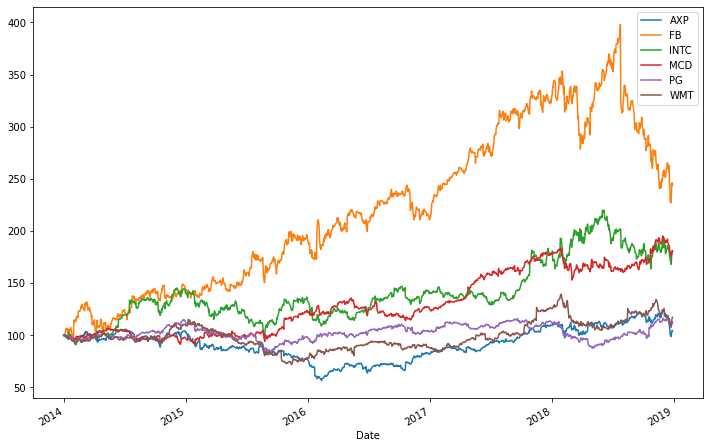

In [18]:
norm.plot(figsize=(12,8))
plt.legend(loc="best")
plt.show()

__Create__ the __Value-weighted__ (Price Return) Index (starting at a Base Value of 100)! __Import__ the __listings_clean.csv__ dataset for calculating the __Market Caps__! Use the __simplified assumption__ that the amount of __shares outstanding do not change__ over time!

In [50]:
listing=pd.read_csv("listings_clean.csv",index_col="Symbol")
listing.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,2.593470e+10,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5.407810e+09,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,4.278113e+10,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,5.314109e+07,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,1.527687e+10,1969,Transportation,Air Freight/Delivery Services


In [51]:
listing["Shares"]=listing.Market_Cap/listing.Last_Price
listing.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry,Shares
Symbol,,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,2.593470e+10,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments,317515869.0
AA,NYSE,Alcoa Corporation,29.15,5.407810e+09,2016,Basic Industries,Aluminum,185516624.0
AABA,NASDAQ,Altaba Inc.,75.39,4.278113e+10,1969,Technology,EDP Services,567464270.0
AAC,NYSE,"AAC Holdings, Inc.",2.16,5.314109e+07,2014,Health Care,Medical Specialities,24602355.0
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,1.527687e+10,1969,Transportation,Air Freight/Delivery Services,449055548.0


In [55]:
us_stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,90.730003,54.650002,25.959999,97.029999,81.410004,78.690002
2014-01-02,89.449997,54.709999,25.790001,96.410004,80.540001,78.910004
2014-01-03,89.739998,54.560001,25.780001,96.540001,80.449997,78.650002
2014-01-06,89.699997,57.200001,25.459999,95.849998,80.639999,78.209999
2014-01-07,89.360001,57.919998,25.590000,96.379997,81.419998,78.449997


In [73]:
stocks_shares=listing.Shares.loc[us_stocks.columns]
stocks_shares

Symbol
AXP     8.387477e+08
FB      2.853990e+09
INTC    4.498668e+09
MCD     7.653173e+08
PG      2.501580e+09
WMT     2.869684e+09
Name: Shares, dtype: float64

In [76]:
stocks_cap=us_stocks*stocks_shares
stocks_cap.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,7.609958e+10,1.559705e+11,1.167854e+11,7.425874e+10,2.036536e+11,2.258155e+11
2014-01-02,7.502598e+10,1.561418e+11,1.160207e+11,7.378425e+10,2.014772e+11,2.264468e+11
2014-01-03,7.526922e+10,1.557137e+11,1.159757e+11,7.388374e+10,2.012521e+11,2.257007e+11
2014-01-06,7.523567e+10,1.632482e+11,1.145361e+11,7.335566e+10,2.017274e+11,2.244380e+11
2014-01-07,7.495050e+10,1.653031e+11,1.151209e+11,7.376128e+10,2.036786e+11,2.251267e+11


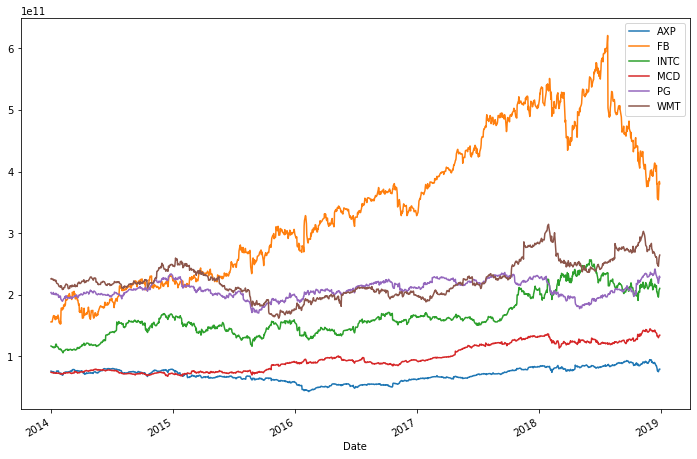

In [77]:
stocks_cap.plot(figsize=(12,8))
plt.show()

In [79]:
cap_index=stocks_cap/stocks_cap.iloc[0]*100
cap_index.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-02,98.589214,100.109784,99.345154,99.361028,98.931332,100.279581
2014-01-03,98.908845,99.835314,99.306633,99.495004,98.820775,99.949168
2014-01-06,98.864757,104.666055,98.073960,98.783880,99.054164,99.390008
2014-01-07,98.490023,105.983524,98.574734,99.330102,100.012276,99.694999


# Recap

135. __price__ weight index


136. __value__ weighted index

135. price weight __return__ index


136. value weighted __return__ index